In [52]:
# imports

import math
import datetime
import time
import searchtweets
import pandas as pd

import string
import warnings
import datetime
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /home/keras/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
"""
def get_tweet_object(search_term, start_date, end_date, num_of_tweets, include_retweets=True):
    
    '''
    takes date range, search term & number of tweets
    
    returns tweets object
    
    input search term as a string
    
    input search range as datetime.datetime(20xx, 1, 20)
    
    include_retweets defaults is True. to exclude retweets set to False.
    
    '''
    
    
    search_args = searchtweets.load_credentials('twitter_keys.yaml',
                                                yaml_key='search_tweets_api',
                                                env_overwrite=False)
    
    if include_retweets:
        
        search_term = search_term + ' lang:en'
    
    else:
        
        search_term = search_term + ' lang:en -is:retweet'
        
    
    
    rule = searchtweets.gen_rule_payload(search_term,
                                         results_per_call=500,
                                         from_date=start_date.strftime('%Y-%m-%d'),
                                         to_date=end_date.strftime('%Y-%m-%d'))     
        
    tweet_objects = []
    
    rs = searchtweets.ResultStream(rule_payload=rule,
                                   max_results=num_of_tweets,
                                   max_pages= num_of_tweets / 500,
                                   **search_args)
    
    start_time = time.time()

    for i, tweet_object in enumerate(rs.stream(), start=1):
        
        if i % 500 == 0:
            
            now = time.time()
            
            if now < start_time + 4:
                
                time.sleep(4 - (now - start_time))
                
                start_time = time.time()
                
        tweet_objects.append(tweet_object)
    
    return tweet_objects

def tweet_obj_to_df(tweet_objects):
    
    tweet_dict = {'text': [],
                  'author': []
                 }
    
    for tweet in tweet_objects:
        
        tweet_dict['text'].append(tweet.all_text)
        
        tweet_dict['author'].append(tweet.screen_name)
    
    tweets_df = pd.DataFrame(tweet_dict)
    
    return tweets_df
    """

def get_tweet_object(search_term, start_date, end_date, num_of_tweets, include_retweets=True):
    
    '''
    takes:
    
    * date range
    * screen name
    * number of tweets to return (500 per page)
       
    input search term as a string
    
    input search range as datetime.datetime(20xx, 1, 20)
    
    include_retweets defaults is True. to exclude retweets set to False.
    
    returns: 
    
    * tweets object with replies to input screen name 
   
    '''
    
    
    search_args = searchtweets.load_credentials('twitter_keyz.yaml',
                                                yaml_key='search_tweets_api',
                                                env_overwrite=False)
    
    if include_retweets:
        
        #search_term = search_term + ' lang:en'
        
        search_term = search_term + ' lang:en'
    
    else:
        
        #search_term = search_term + ' lang:en -is:retweet'
        
        search_term = search_term + ' lang:en -is:retweet'
        
    
    
    rule = searchtweets.gen_rule_payload(search_term,
                                         results_per_call=500,
                                         from_date=start_date.strftime('%Y-%m-%d'),
                                         to_date=end_date.strftime('%Y-%m-%d'))     
        
    tweet_objects = []
    
    rs = searchtweets.ResultStream(rule_payload=rule,
                                   max_results=num_of_tweets,
                                   max_pages=math.ceil(num_of_tweets / 500.0),
                                   **search_args)
    
    start_time = time.time()
    
    # error handling & rate limiting for requests
    
    try:
        
        # generator 

        for i, tweet_object in enumerate(rs.stream(), start=1):
            
            # check every 500 requests, ie every page
        
            if i % 500 == 0:
            
                now = time.time()
                
                # four second delay
            
                if now < start_time + 4:
                
                    time.sleep(4 - (now - start_time))
                
                    start_time = time.time()
                
            tweet_objects.append(tweet_object)
    
    except Exception as e:
        
        print("Error from Twitter API: %s. Fetched %d tweet_objects" % (e, len(tweet_objects)))
    
    return tweet_objects

In [25]:
# get_tweet_object(search_term, start_date, end_date, num_of_tweets, include_retweets=True):
# return tweets_df

rdskins_tweet_objects = get_tweet_object('redskins', datetime.datetime(2007,1,24), datetime.datetime(2020,1,24), 100000, include_retweets=False)
    

Grabbing bearer token from OAUTH


In [26]:
rdskins_raw_df = tweet_obj_to_df(rdskins_tweet_objects)

In [27]:
print(len(rdskins_raw_df), '\n')

print(rdskins_raw_df.head(25))

100000 

                                                 text           author
0   @CandlestickWill @Redskins Thanks - have you s...    PaulNicholsDC
1   @Redskins @MDLottery @AP_Images @JoeGibbsRacin...      GaryBasnett
2   Redskins offensive lineman Brandon Scherff is ...     EmpireGotham
3   @swayrun21 And he’d be ANOTHER #Buckeye on the...       GuyBuckeye
4                 @UncleWellons @Redskins Can’t do it      _TommyMcCoy
5   'Redskins add two more to coaching staff in Br...       rmarine_75
6   'For the Redskins, the No. 2 pick is a win, ei...       rmarine_75
7   'Redskins should pay attention to pass catcher...       rmarine_75
8   @_rich_moore @JayKogen @AlJean @MikeReissWrite...    dailysimpsons
9   @BangRadioHour @Redskins True but not guarante...       wsk28rules
10  @Redskins @MDLottery @AP_Images @JoeGibbsRacin...  FredHarshberger
11  Throwing it back to the legendary Coach Joe Gi...         Redskins
12   @redskinsfyi @Trezaye @TreyyMB @Redskins They’re     bigbrussel

In [29]:
# save as csv

rdskins_raw_df.to_csv('rdskins_raw_df_Jan_24_2020.csv')

In [3]:
def clean_tweets_for_vocab(doc, search_term):
    
    '''
    takes input document:
    
    * lowercases
    * removes non-alpha characters
    * removes tweet artifacts (screen names, 'RT', '@')
    * removes stopwords
    * tokenizes
    
    returns clean document
    
    '''
    
    # remove punctuation
    
    doc = ''.join(c if c.isalpha() else ' ' for c in doc)
    
    # tokenize
    
    split_tokens = doc.split()
    
    # remove twitter artifacts & search term
    
    cleaner_tokens = [word.lower() for word in split_tokens
                     if 'http' not in word
                     and '@' not in word
                     and '<' not in word
                     and 'RT' not in word
                     and 'amp' not in word.lower()
                     and search_term.lower() not in word.lower()
                     ]
    
    # remove stopwords
    
    clean_tokens = [t for t in cleaner_tokens if t.lower() not in stopwords.words('english')]
    
    return clean_tokens

def get_vocab_df(docs):
    
    '''
    takes a list of clean docs
    
    returns dataframe with vocabulary counts
    returns total words
    returns unique words
    
    '''
    
    vocab = []
    
    for document in docs:
        
        for word in document:
            
            vocab.append(word)
    
    total_words = len(vocab)
    
    word_count = Counter(vocab)
    
    num_unique_words = len(word_count)
    
    # Counter() is a dictionary, has to be converted as such
    
    vocab_df = pd.DataFrame.from_dict(word_count, orient='index')
    
    # rearrange the dataframe so it's easy to index/use
    # sort by number of times a word appears
    # add an index & rename columns
    
    vocab_df = vocab_df.sort_values(by=0, ascending=False)
    
    vocab_df = vocab_df.reset_index().rename(columns={'index':'word', 0:'count'})
    
    # return df with sorted vocab
    
    #return vocab_df.sort_values(by='count', ascending=False), total_words, num_unique_words
 
    return vocab_df, total_words, num_unique_words

    #return total_words, num_unique_words, vocab_df


def clean_text_for_wordcloud(df, col, search_term):

    '''
    takes input dataframe

    * applies light cleaning for wordcloud
    * removes search term, non alpha characters & tweet artifacts

    returns dataframe with clean text
    
    '''
    
    for i in range(len(df[col])):
        
        df[col][i] = ' '.join([word for word in df[col][i].split()
                               if 'http' not in word and '@' not in word
                               and '<' not in word and 'RT' not in word
                               and 'amp' not in word.lower() and 'rt' not in word
                               and search_term.lower() not in word.lower()])
        
    return df

def get_wordcloud(df, col):
    
    '''
    takes a clean dataframe
    
    generates wordcloud
    
    '''
    
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          random_state=0).generate(' '.join([i for i in df[col]]))
    
    plt.figure(figsize=(20, 10), facecolor='k')
    
    plt.imshow(wordcloud)
    
    plt.axis('off')
    
    # print date/time wordcloud is generated
    
    datetime_obj = datetime.datetime.now()
    
    time_delta = datetime.timedelta(hours=5)
    
    time_now_EST = datetime_obj - time_delta
    
    print('Wordcloud Generated at: ', time_now_EST, ' EST')

### text processing

In [32]:
# rdskins_raw_df
# clean_df_for_vocab = df[col].apply(clean_tweets_for_vocab, args=(search_term,))

rs_clean_df = rdskins_raw_df['text'].apply(clean_tweets_for_vocab, args=('redskins',))

In [33]:
rs_clean_df.head(25)

0     [candlestickwill, thanks, seen, carlos, cordon...
1     [mdlottery, ap, images, joegibbsracing, one, p...
2     [offensive, lineman, brandon, scherff, set, be...
3            [swayrun, another, buckeye, gobucks, httr]
4                                        [unclewellons]
5     [add, two, coaching, staff, brett, nenaber, je...
6     [pick, win, either, way, via, riggosrag, co, m...
7     [pay, attention, pass, catchers, shining, seni...
8     [rich, moore, jaykogen, aljean, mikereisswrite...
9     [bangradiohour, true, guaranteed, generational...
10    [mdlottery, ap, images, joegibbsracing, good, ...
11    [throwing, back, legendary, coach, joe, gibbs,...
12                                   [trezaye, treyymb]
13             [gavin, hall, james, sperry, tech, fall]
14    [troydreyfus, billyweaver, would, win, super, ...
15    [hope, see, win, super, bowl, first, co, hofdx...
16    [paulnicholsdc, love, might, need, sketch, gia...
17    [trezaye, treyymb, chad, forbes, research,

In [34]:
# save as csv

rs_clean_df.to_csv('rs_clean_df_Jan_24_2020.csv')

Wordcloud Generated at:  2020-01-25 22:21:23.854191  EST


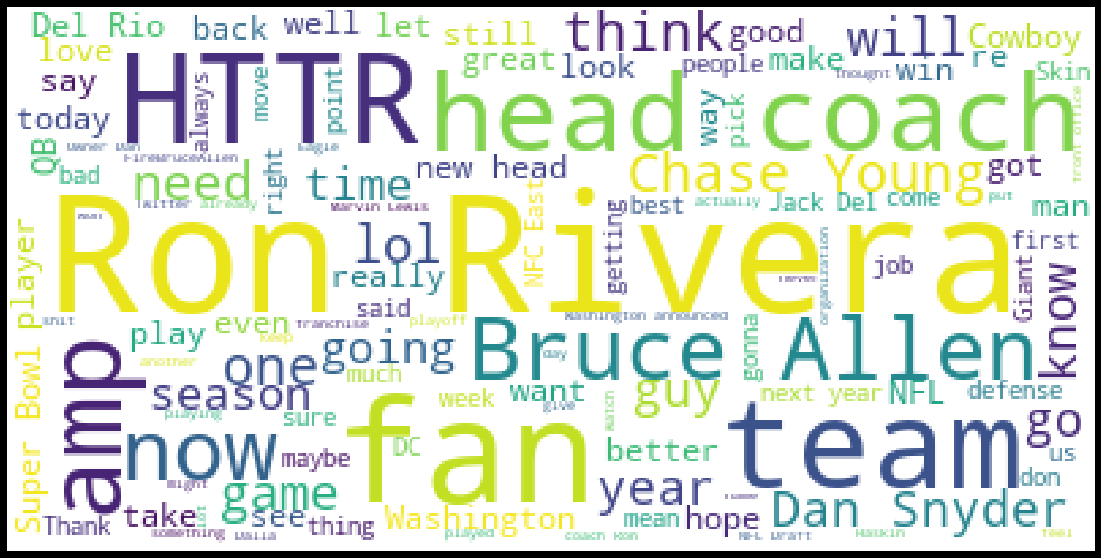

In [36]:
# clean_text_for_wordcloud(df, col, search_term
# def get_wordcloud(df, col)

rs_wordcloud_df = clean_text_for_wordcloud(rdskins_raw_df, 'text', 'redskins')

get_wordcloud(rs_wordcloud_df, 'text')

In [38]:
# tweet_df_no_RTs[tweet_df_no_RTs['text'].str.contains('Indian')]
# rs_clean_df

rs_f_df = rdskins_raw_df[rdskins_raw_df['text'].str.contains('filthy')]

rs_F_df = rdskins_raw_df[rdskins_raw_df['text'].str.contains('Filthy')]

rs_fF_df = rs_f_df.append(rs_F_df)

rs_fF_df = rs_fF_df.reset_index()

rs_fF_df = rs_fF_df.drop(columns=['index'])

print(len(rs_f_df), '\n')

print(len(rs_F_df), '\n')

print(len(rs_fF_df), '\n')

print(rs_fF_df.head())

3 

4 

7 

                                                text         author
0  The Washington of public everyone... GROSS! Me...     AlanLepore
1  The sad of this, only 1 in the last decade. Ev...      tomlapp66
2  Unless you’re a Orioles fan, which there are a...      Josh_DM96
3  Totally untrue about Cousins. fans are more li...       leefer67
4  Um my guess because of the exorbitant cost to ...  HmichaelSmith


In [42]:
# tweet_df_no_RTs[tweet_df_no_RTs['text'].str.contains('Indian')]
# rs_clean_df

rs_d_df = rdskins_raw_df[rdskins_raw_df['text'].str.contains('murderous')]

rs_D_df = rdskins_raw_df[rdskins_raw_df['text'].str.contains('Murderous')]

rs_dD_df = rs_d_df.append(rs_D_df)

rs_dD_df = rs_dD_df.reset_index()

rs_dD_df = rs_dD_df.drop(columns=['index'])

print(len(rs_d_df), '\n')

print(len(rs_D_df), '\n')

print(len(rs_dD_df), '\n')

print(rs_dD_df.head())

1 

0 

1 

                                                text      author
0  If you can stand in front of a Native American...  kaygesmile


In [46]:
rdskin_tweet_objects = get_tweet_object('redskin', datetime.datetime(2007,1,24), datetime.datetime(2020,1,25), 100000, include_retweets=False)

Grabbing bearer token from OAUTH


In [47]:
# tweet_objects = get_tweet_object('query', datetime.datetime(2007,1,24), datetime.datetime(2020,1,24), 100000, include_retweets=False)
# raw_df = tweet_obj_to_df(tweet_objects)
# print(len(raw_df), '\n')
# print(raw_df.head(25))
# raw_df.to_csv('raw_df_Jan_24_2020.csv')

rdskn_raw_df = tweet_obj_to_df(rdskin_tweet_objects)

In [48]:
print(len(rdskn_raw_df), '\n')

print(rdskn_raw_df.head())

100000 

                                                text           author
0  Taught some French for my Redskin Rumble activ...    mlwilliams614
1  @Inevitable_ET 49% SanFran cause I like Kyle (...       CRhinehold
2  @Arj_Romeo Tua, very unlikely that someone ahe...    JamesMurphy34
3  @Tiller56 In my experience you are the most le...  NorthernAZDevil
4  @bentleyhaskins I want to see him stay at this...    rant_redskins


In [49]:
rdskn_raw_df.to_csv('rdskin_raw_df_Jan_25_2020.csv')

In [55]:
rdskn_f_df = rdskn_raw_df[rdskn_raw_df['text'].str.contains('filthy')]

rdskn_F_df = rdskn_raw_df[rdskn_raw_df['text'].str.contains('Filthy')]

rdskn_fF_df = rdskn_f_df.append(rdskn_F_df)

rdskn_fF_df = rdskn_fF_df.reset_index()

rdskn_fF_df = rdskn_fF_df.drop(columns=['index'])

print(len(rdskn_f_df))

print(len(rdskn_F_df))

print(len(rdskn_fF_df))

print(rdskn_fF_df.head(10))

15
3
18
                                                text          author
0  @BrendanSchaub @KirkCousins8 I wouldn’t say “H...   MelissaJoy707
1  @bradygraham01 @asben16 @Midland_Redskin Boy i...         JWRay09
2  @redskin_potato @gabrielmalor So why wouldn't ...    flgators1515
3  And folks thought it was asinine when I shared...     Sean_Bishop
4  At a stoplight and a woman pulled up next to m...     Sattazahn15
5  This bitch said she looks like the Redskin log...  hubcityWetback
6  Redskin haters are going to be shook when they...      FlyersPoop
7  @GuidingToSafety "I maybe a big but at least I...  TheWrathOfBell
8  @LenardNPC @colinflaherty @Stanohio @HenryDoua...  BobbydoggBobby
9  @Stanohio @HenryDouanier @colinflaherty You we...       LenardNPC


In [60]:
for tweet in rdskn_fF_df['text']:
    
    print('\n', tweet)


 @BrendanSchaub @KirkCousins8 I wouldn’t say “HUGE” buuut he’s a super likable guy and happy to be able to admit that now that he’s no longer a filthy Redskin lol 😂

 @bradygraham01 @asben16 @Midland_Redskin Boy it’s Buxton but he’s filthy too 🔥

 @redskin_potato @gabrielmalor So why wouldn't the house let Republicans speak, and were is the cry out of Biden crooked thievery son. Democrats have been stealing from this country for years, killing their enemies, screwing over the American people while getting filthy rich. You people are pathetic

 And folks thought it was asinine when I shared a story about a fellow fan who happens to be a Native being taunted and called "a filthy redskin whore" AFTER a win... BY FELLOW fans who were head to toe in Washington gear and saw her in Washington gear. Our "fans" are trash. https://t.co/Z12yROuDn2
I can’t believe people are blaming Trent for not going for a second opinion. They’ll do ANYTHING to shove the Skins dick down their throats

 At a sto

### specific searches

In [122]:
# ("Twitter" and "search")
# tweet_objects = get_tweet_object('redskin', datetime.datetime(2007,1,24), datetime.datetime(2020,1,25), 100000, include_retweets=False)

dr_tweet_objects = get_tweet_object('("redskins" and "dirty")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [123]:
# get df

dr_raw_df = tweet_obj_to_df(dr_tweet_objects)

print(len(dr_raw_df), '\n')

print(dr_raw_df.head())


2060 

                                                text          author
0  @ProFootballTalk @hwkbgr Philly fans complain ...      jyoaee2125
1  So over the last 72 hours:\n\n- the Birds get ...    Philly_Canes
2  @EvanMcMullin ✔    I'm a Redskins fan and born...  redskinsravens
3  Giants, Cowboys and Redskins fans when the res...   JimmyRandazzo
4  @ParkerHamlett @Redskins Saints and ravens her...       DougieD35


In [124]:
dr_raw_df.to_csv('dr_raw_df_Jan_25_2020.csv')

In [125]:
sr_tweet_objects = get_tweet_object('("redskins" and "stupid")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [126]:
# df: 'stupid' & 'r*dskin'

sr_raw_df = tweet_obj_to_df(sr_tweet_objects)

print(len(sr_raw_df), '\n')

print(sr_raw_df.head())

7782 

                                                text        author
0  @FedExField @Redskins @RSprachrohr Yall are so...  ForQuickNews
1  Only way I trade down if I’m the Redskins is i...   PeachOmania
2  @funnydanny Maryland is now Ravens country...c...       MiceM11
3  @RickMaese @ErinatThePost @OvettaWashPost Why ...      DeezNats
4  @Redskins @flightmarshalls We all should be a ...       jaydw83


In [127]:
sr_raw_df.to_csv('sr_raw_df_Jan_25_2020.csv')

In [128]:
ur_tweet_objects = get_tweet_object('("redskins" and "ugly")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [129]:
ur_raw_df = tweet_obj_to_df(ur_tweet_objects)

print(len(ur_raw_df), '\n')

print(ur_raw_df.head())

4011 

                                                text        author
0  The 2017 Vikings had a top ten offense with a ...  joe_thom1998
1  @davidgraeber not compete with sports teams fr...  PotemkinLion
2  @Jets_NEFL20 @Saints_NEFL20 @Redskins_NEFL20 Y...  Bears_NEFL20
3  @JPFinlayNBCS Twitter can be an ugly place. Lo...  John_Tyreman
4  @Jawn_BonJovi @Redskins Jawn, they are Racials...   MikeWiseguy


In [130]:
ur_raw_df.to_csv('ur_raw_df_Jan_25_2020.csv')

In [131]:
fr_tweet_objects = get_tweet_object('("redskins" and "filthy")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [132]:
# get dataframe

fr_raw_df = tweet_obj_to_df(fr_tweet_objects)

print(len(fr_raw_df), '\n')

print(fr_raw_df.head())

148 

                                                text          author
0  @ProFootballTalk Um my guess because of the ex...   HmichaelSmith
1  The sad part of this, @Giants only 1 in the la...       tomlapp66
2  @StoopKid1818 @OndreLeonard30 @Zirksee and the...    Nick48094751
3  @Bowblax He also said that the natives deserve...   Greg69Heffley
4  49’ers/Redskins is some nasty, filthy, throwba...  jamestingstrom


In [133]:
fr_raw_df.to_csv('fr_raw_df_Jan_25_2020.csv')

In [134]:
ri_tweet_objects = get_tweet_object('("redskins" and "indian")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [135]:
# get dataframe: r*dskins & Indian

ri_raw_df = tweet_obj_to_df(fr_tweet_objects)

print(len(ri_raw_df), '\n')

print(ri_raw_df.head())

148 

                                                text          author
0  @ProFootballTalk Um my guess because of the ex...   HmichaelSmith
1  The sad part of this, @Giants only 1 in the la...       tomlapp66
2  @StoopKid1818 @OndreLeonard30 @Zirksee and the...    Nick48094751
3  @Bowblax He also said that the natives deserve...   Greg69Heffley
4  49’ers/Redskins is some nasty, filthy, throwba...  jamestingstrom


In [136]:
ri_raw_df.to_csv('ri_raw_df_Jan_25_2020.csv')

In [139]:
rb_tweet_objects = get_tweet_object('("redskins" and "blood")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [140]:
rb_raw_df = tweet_obj_to_df(rb_tweet_objects)

print(len(rb_raw_df), '\n')

print(rb_raw_df.head())

1949 

                                                text        author
0  Law enforcement\nFrom a    Suitland and Redski...   JoeMcgill67
1  @DLoesch As someone with Cherokee blood! I am ...   gillburgkid
2  @BurgundyBlog Redskins need to get rid of all ...      cobane03
3  @Saints_NEFL20 @Jets_NEFL20 @Redskins_NEFL20 I...  Bears_NEFL20
4  A new season and a new look with some updated ...  DeuceDouglas


In [141]:
rb_raw_df.to_csv('rb_raw_df_Jan_25_2020.csv)')

In [143]:
rsc_tweet_objects = get_tweet_object('("redskins" and "scalp")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [144]:
rsc_raw_df = tweet_obj_to_df(rsc_tweet_objects)

print(len(rsc_raw_df), '\n')

print(rsc_raw_df.head())

370 

                                                text           author
0  @SNFonNBC @ProFootballTalk @CSimmsQB None of t...       RyanClear2
1  @Bobbin76818496 The last time a person used th...  FrancesMFDanger
2  @fuckcancer56 And why was he placed on injured...         bells110
3  REDSKINS NEED TO FIX THEIR ACT. Trent Williams...     keefer_aydon
4  @RMNarrative @EdgeofSports I don't think he'd ...    PettyWakandan


In [145]:
rsc_raw_df.to_csv('rsc_raw_df_Jan_25_2020.csv')

In [187]:
rsv_tweet_objects = get_tweet_object('("redskins" and "savage")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [188]:
rsv_raw_df = tweet_obj_to_df(rsv_tweet_objects)

print(len(rsv_raw_df), '\n')

print(rsv_raw_df.head())

539 

                                                text         author
0  Nick Bosa is the perfect example of why the Re...     HTTRChamps
1  If the Bengals shock and go Chase Young 1st ov...    HSprings719
2  @Savage_Package @94tilinfinite Are you a packe...     Rellihan51
3  @Savage_Torrey3 @ktewfikS @StephenChesser0 @Li...       Zachosh3
4  "Good job. You're kinda good at football."\n\n...  art_stapleton


In [189]:
rsv_raw_df.to_csv('rsv_raw_df_Jan_26_2020.csv')

In [150]:
rdd_tweet_objects = get_tweet_object('("redskins" and "dead")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [151]:
rdd_raw_df = tweet_obj_to_df(rdd_tweet_objects)

print(len(rdd_raw_df), '\n')

print(rdd_raw_df.head())

4171 

                                                text        author
0  @FedExField @Redskins @RSprachrohr Yall are so...  ForQuickNews
1  Redskins climbing this list once we cut some d...   stewiecoats
2  @Redskins @flightmarshalls We all should be a ...       jaydw83
3  Redskins player Montae Nicholson dropped an un...    TishaLewis
4  would love to have him opposite of mcclaurin. ...  bighomiehawk


In [152]:
rdd_raw_df.to_csv('rdd_raw_df_Jan_26_2020.csv')

In [153]:
rkl_tweet_objects = get_tweet_object('("redskins" and "killed")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [154]:
rkl_raw_df = tweet_obj_to_df(rkl_tweet_objects)

print(len(rkl_raw_df), '\n')

print(rkl_raw_df.head())

2870 

                                                text          author
0  @MattKHOU @Redskins @NFL This @NFL player viol...  SusanChanaLask
1  @JuiceCheck44 You’re a wizard kyle! Does that ...     RICKDOGG424
2  Do you actually think that the indigenous peop...        cultyooa
3  @CalsCruitin @VinceSchilling @49ers @Chiefs Ra...     Levi__Adams
4  @HStMovemberfest @TerrapinHoops @umterps It’s ...         shrshot


In [155]:
rkl_raw_df.to_csv('rkl_raw_df_Jan_26_2020.csv')

In [156]:
rsx_tweet_objects = get_tweet_object('("redskins" and "sexy")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [157]:
rsx_raw_df = tweet_obj_to_df(rsx_tweet_objects)

print(len(rsx_raw_df), '\n')

print(rsx_raw_df.head())

995 

                                                text           author
0  @BigManPauly @Redskins Expect the off season t...          sonnyg9
1  Russini: Ron Rivera hire smart but not sexy by...    RyboSkinsHTTR
2  @ANTallDay21 @JPFinlayNBCS chase young is the ...       fstaylor21
3  @diannaESPN as a Redskins fan im not sure what...  LafayetteAzvedo
4  Sexy hire? No. Smart? Infinitely. Columnist @J...       PostSports


In [158]:
rsx_raw_df.to_csv('rsx_raw_df_Jan_26_2020.csv')

In [159]:
rib_tweet_objects = get_tweet_object('("redskins" and "indian blood")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [160]:
rib_raw_df = tweet_obj_to_df(rib_tweet_objects)

print(len(rib_raw_df), '\n')

print(rib_raw_df.head())

20 

                                                text           author
0  And ... i have American Indian Blood and i Roo...       Naztitle01
1  @nictuttle @gsidebo @DavidAFrench I have more ...  quesogrande1970
2  AS AN ANDERSON ALUM AND SOMEONE THAT ACTUALLY ...       NahBabyNah
3  @Andrew_B_Bader @hankschulman Why? I have have...          3426674
4  REDSKINS IS NOT RACIST NAME FUCKING A MAN HOLY...   _____Squidward


In [161]:
rib_raw_df.to_csv('rib_raw_df_Jan_26_2020.csv')

In [162]:
rrsv_tweet_objects = get_tweet_object('("redskins" and "reservation")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [163]:
rrsv_raw_df = tweet_obj_to_df(rrsv_tweet_objects)

print(len(rrsv_raw_df), '\n')

print(rrsv_raw_df.head())

458 

                                                text          author
0  Apartheid at Pechanga Reservation. Yes, Segreg...       opechanga
1  @VinceSchilling @49ers @Chiefs @NFL @Redskins ...  RealbrianBlade
2  @VinceSchilling @49ers @Chiefs @VinceSchilling...       KaraJenne
3  @VinceSchilling @49ers @Chiefs @NFL You know a...        bigs1226
4  @DesertHawk99 @bmcsusn1963 @VinceSchilling @49...         jam4821


In [164]:
rrsv_raw_df.to_csv('rrsv_raw_df_Jan_26_2020.csv')

In [165]:
rsmp_tweet_objects = get_tweet_object('("redskins" and "smallpox")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [166]:
rsmp_raw_df = tweet_obj_to_df(rsmp_tweet_objects)

print(len(rsmp_raw_df), '\n')

print(rsmp_raw_df.head())

138 

                                                text      author
0  Whether it's the first to be the Patriots givi...  testing_a1
1  Karma would mean the Aboriginal Ppl would own ...       DrN0_
2  redskins will make baby yoda beaded jewelry an...  buffpharah
3  #Blakes7 Season 2, Episode 07 - Killer\nBLAKE:...  blakes7bot
4  Season 2, Episode 07 - Killer\nBLAKE:  Mm, pre...  blakes7bot


In [167]:
rsmp_raw_df.to_csv('rsmp_raw_df_Jan_26_2020.csv')

In [170]:
rdrk_tweet_objects = get_tweet_object('("redskins" and "drunk")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [171]:
rdrk_raw_df = tweet_obj_to_df(rdrk_tweet_objects)

print(len(rdrk_raw_df), '\n')

print(rdrk_raw_df.head())

1797 

                                                text           author
0  @VinceSchilling @49ers @Chiefs What does Vince...  JaneJon54227850
1  Very much worth reading.\n\nI got into a drunk...      irritated_1
2  @WojoYah00NBA @TylerIAm The cardinals gm got a...        charkmeal
3  @stephenasmith @Browns @dallascowboys @Giants ...          jcraw40
4  @czabe I once wore a Randy Moss jersey to a Re...    JockSupporter


In [172]:
rdrk_raw_df.to_csv('rdrk_raw_df_Jan_26_2020.csv')

In [173]:
rinj_tweet_objects = get_tweet_object('("redskins" and "injun")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [174]:
rinj_raw_df = tweet_obj_to_df(rinj_tweet_objects)

print(len(rinj_raw_df), '\n')

print(rinj_raw_df.head())

54 

                                                text           author
0  Generations later, my relatives are far more e...           AudryT
1  Elizabeth Warren a Direct Descendant of Militi...  FormerRepublic9
2  we redskins aren’t going to march into korea p...          Iucasmr
3  @BreitbartNews And as an injun she should know...       kdodson106
4  Goddammit, two of the top songs I want to do a...       NekoMcEvil


In [175]:
rinj_raw_df.to_csv('rinj_raw_df_Jan_26_2020.csv')

In [176]:
rextr_tweet_objects = get_tweet_object('("redskins" and "exterminate")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [177]:
rextr_raw_df = tweet_obj_to_df(rextr_tweet_objects)

print(len(rextr_raw_df), '\n')

print(rextr_raw_df.head())

8 

                                                text           author
0  @thehill Hitler's plan was to create extra liv...            adze4
1  @MattWalshBlog Let's not forget he also normal...        scsimodem
2  @WASBAPPIN @AllCopsAreIncel @puristwhiner @chi...  thegrahamcanyon
3  @clugstack @dearnonnatives @_nicholus3 @lilnat...        AliNahdee
4  @ACLU @ACLUVA @RVAwonk @Redskins WHEN YOU HAVE...         blogdiva


In [178]:
rextr_raw_df.to_csv('rextr_raw_df_Jan_26_2020.csv')

In [179]:
rext_tweet_objects = get_tweet_object('("redskins" and "extinct")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [180]:
rext_raw_df = tweet_obj_to_df(rext_tweet_objects)

print(len(rext_raw_df), '\n')

print(rext_raw_df.head())

28 

                                                text          author
0  This is in response to a local school district...  gretelkauffman
1  @LakeRaMan Didn’t miss a single LA Rams game f...       JBroFronk
2  @franchescag97 Basically. The native American ...  MakeupWhoreder
3  @nfl this league gets worse and worse every ye...     kidkapper10
4  They were murdered, raped, forced from their h...         EsAy313


In [181]:
rext_raw_df.to_csv('rext_raw_df_Jan_26_2020.csv')

In [182]:
rfw_tweet_objects = get_tweet_object('("redskins" and "firewater")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [183]:
rfw_raw_df = tweet_obj_to_df(rfw_tweet_objects)

print(len(rfw_raw_df), '\n')

print(rfw_raw_df.head())

25 

                                                text           author
0  @ewarren Oh Lizzy..This is the GREATEST News E...    rebelfrom1944
1  Man, if we Redskins only had those instead of ...  William42870346
2  Strange smoke signals and scary loud music in ...      WWPFInsider
3  @JoyAnnReid Just like the redskins and that fi...  patrickfcox_cox
4  Third, #SonicDriveIn most disturbing 2 scalpin...  EmmyNawjoopinga


In [184]:
rfw_raw_df.to_csv('rfw_raw_df_Jan_26_2020.csv')

In [190]:
rig_tweet_objects = get_tweet_object('("redskins" and "ignorant")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [191]:
rig_raw_df = tweet_obj_to_df(rig_tweet_objects)

print(len(rig_raw_df), '\n')

print(rig_raw_df.head())

967 

                                                text           author
0  @ztipton85 @espn @Chiefs @Redskins As a woman ...  AriannaChavarr1
1  @Redsunhero @bmcsusn1963 And I am 50. I rememb...       RJ_Number8
2  @rant_redskins @powhatannative @don1964a @Skru...     NudaleKawonu
3  @Skrub_3 @PrincessKnightD @BradGGallant @Burgu...   TheBandGreport
4  @CrunkATL @Redskins As ignorant as they are, t...           FTCUTD


In [192]:
rig_raw_df.to_csv('rig_raw_df_Jan_26_2020.csv')

In [193]:
rlz_tweet_objects = get_tweet_object('("redskins" and "lazy")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [194]:
rlz_raw_df = tweet_obj_to_df(rlz_tweet_objects)

print(len(rlz_raw_df), '\n')

print(rlz_raw_df.head())

715 

                                                text         author
0  @Kareem_captain1 @Habib1852 I can't. I'm not i...      john_keim
1  @Bwats21 @bentleyhaskins Exactly.  People like...    BrandonW573
2  @Bungie Bungie needs to get off there a**es an...  stephenshook1
3  @SBNation .... Redskins beat the Panthers on t...    EmbersToAsh
4  @pantherpundit @officialsdrd @Redskins Stop it...       N_Z_A_15


In [196]:
rlz_raw_df.to_csv('rlz_raw_df_Jan_26_2020.csv')

In [4]:
rsa_tweet_objects = get_tweet_object('("redskins" and "raped")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [5]:
rsa_raw_df = tweet_obj_to_df(rsa_tweet_objects)

print(len(rsa_raw_df), '\n')

print(rsa_raw_df.head())

363 

                                                text        author
0  @HeatleyJared Yea I get that, for me, my entir...  RedskinsRant
1  @KevinWhoItBe And I hope the redskins get rape...     nail_sahn
2  @Liz_Cheney Why do #NativeAmericans have to to...    kaimatters
3  I can’t wait to watch the Eagles get ass raped...      DanoSoko
4  @aprildeming With respect, I think this is a S...      Omcgill1


In [6]:
rsa_raw_df.to_csv('rsa_raw_df_Jan27_2020.csv')

In [7]:
rdb_tweet_objects = get_tweet_object('("redskins" and "dumb")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [8]:
rdb_raw_df = tweet_obj_to_df(rdb_tweet_objects)

print(len(rdb_raw_df), '\n')

print(rdb_raw_df.head())

5718 

                                                text          author
0  @TheDMVDailyy @Redskins This dumb as hell. Y’a...  DaBeardologist
1  @JackMBDTF @DakZekeCooper @BleacherReport @brg...   slevin_heaven
2  @MattFontana83 No and I wish the organization ...     jkingery727
3  What I don't understand is that there is a but...  kevinsheehanjc
4  @Nate_Neal27 @TarantinoMike94 @GoPack1233 @Kee...   DillyDillyy87


In [9]:
rdb_raw_df.to_csv('rdb_raw_df_Jan_27_2020.csv')

In [10]:
rbw_tweet_objects = get_tweet_object('("redskins" and "backwards")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [11]:
rbw_raw_df = tweet_obj_to_df(rbw_tweet_objects)

print(len(rbw_raw_df), '\n')

print(rbw_raw_df.head())

674 

                                                text         author
0  @BarstoolReags Redskins +4.5 vs Eagles this ye...      GTRandy27
1  Why does anyone want to see Amari Cooper in a ...         ke0477
2  @stephenasmith @Browns @dallascowboys @Giants ...         xROC7x
3  @stephenasmith @Browns @dallascowboys @Giants ...  FrankRomeo213
4  @stephenasmith @Browns @dallascowboys @Giants ...        dupri28


In [12]:
rbw_raw_df.to_csv('rbw_raw_df_Jan_27_2020')

In [13]:
rnbr_tweet_objects = get_tweet_object('("redskins" and "inbred")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [14]:
rnbr_raw_df = tweet_obj_to_df(rnbr_tweet_objects)

print(len(rnbr_raw_df), '\n')

print(rnbr_raw_df.head())

16 

                                                text           author
0  @skinz25 @bpman11 @CelticsIn2 @Eagles Based on...  JerryJonesGhost
1  I’m pretty sure we are all dead, and being a #...  RedskinsAddicts
2  @ChipReiderson Apparently one of these inbred ...     DaveHarris73
3  Name Change "Washington RedSKINS? How about a ...  JamesMichaelCr6
4  @espn980 @Redskins @thecooleyzone @kevins980 A...        Zaktronic


In [15]:
rnbr_raw_df.to_csv('rnbr_raw_df_Jan_27_2020.csv')

In [16]:
rd_tweet_objects = get_tweet_object('("redskins" and "died")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [20]:
rd_raw_df = tweet_obj_to_df(rd_tweet_objects)

print(len(rd_raw_df), '\n')

print(rd_raw_df.head(20))

1167 

                                                 text           author
0   Woman, 21, dropped off at ER by Redskins playe...    Man76Infantry
1   Woman, 21, dropped off at ER by Redskins playe...          Jaize18
2   Woman, 21, dropped off at ER by Redskins playe...      RitchieJodi
3   Woman, 21, dropped off at ER by Redskins playe...    T_dot_Lee_PhD
4   Woman, 21, dropped off at ER by Redskins playe...      shiawase428
5   Woman, 21, dropped off at ER by Redskins playe...         GaBrat66
6   Woman, 21, dropped off at ER by #Redskins play...     GlobalNewsTH
7   Autopsy result reveals Julia Crabbe died from ...    KolbieReports
8   This is terrible and sad. Why are such accompl...       Autopsy_MD
9   The 21-year-old woman who was brought unconsci...     nexxlvlconvo
10  Julia Crabbe, 21 yr. old friend of Montae Nich...     mikejbabcock
11  No sense in debating this any more. The issue ...   RedskinsReview
12  @WRC_Candess @1stLadiesOfFB @KissProducts @Red...     andythebutts

In [27]:
rd_raw_df.to_csv('rd_raw_df_Jan_27_2020.csv')

In [19]:
rde_tweet_objects = get_tweet_object('("redskins" and "die")', datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 25000, include_retweets=False)

Grabbing bearer token from OAUTH


In [28]:
rde_raw_df = tweet_obj_to_df(rde_tweet_objects)

print(len(rde_raw_df), '\n')

print(rde_raw_df.head(20))

5699 

                                                 text           author
0   As a die hard @Redskins fan I hated playing ag...    Someoneplace8
1   Wishing the happiest of birthdays to my favori...      hammNchees3
2   @steelercam I have a friend who’s a 💯% Redskin...       mztweeylu2
3   Kyle Shanahan is now headed to his 2nd Super B...      RawlingsA82
4   Growing up in Va Beach, I was a diehard Chiefs...        crazypnut
5   @gold_jag5 @TonyKhan @YannickNgakoue You’re a ...    WhyAmIhere_27
6   @jenniferpierson I'd die before I ever rooted ...         Skykam1_
7   I'm a Ride or Die Redskins Fan sir but I give ...       Blondheim3
8   This is the only pic I have of him. He was a d...       JLBfromDVM
9   A Racist problem. Unfortunately Almost all of ...        LarTheTar
10  Hey @cowboys fans imma die hard @Redskins fan,...       bisonskins
11  I am die hard redskins fan but damnn I know my...  Santana_Diabloo
12  I will die on this hill - but @RiverboatRonHC ...   travis_holland

In [29]:
rde_raw_df.to_csv('rde_raw_df_Jan_27_2020.csv')

In [41]:
def get_team_terms_df(team_list, term_list):
    
    team_terms_df = pd.DataFrame()
    
    for team in team_list:
        
        for term in term_list:
            
            search_term = '("' + team + '" and "' + term + '")'
            
            # get up to 10k tweets for each term
    
            tweet_objects = get_tweet_object(search_term, datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 10000, include_retweets=False)
            
            raw_df = tweet_obj_to_df(tweet_objects)
            
            team_terms_df.append(raw_df, ignore_index=True)

            print('results for ' + team + ' and ' + term + ': ', len(raw_df), '\n')
    
    return team_terms_df


In [40]:
team_A = 'TEAM A'
term_B = 'TERM B'


print('results for ' + team_A + ' and ' + term_B + ': ', len(rde_raw_df), '\n')

results for TEAM A and TERM B:  5699 



In [36]:
term_list = ['dirty','filthy','stupid','ugly','indian',
             'blood','scalp','savage','dead','killed',
             'sexy','indian blood','drunk','injun',
             'exterminate','extinct','firewater',
             'reservation','smallpox','ignorant',
             'raped','die','dumb','backwards',
             'inbred','died']

In [37]:
team_list = ['chiefs','falcons','patriots','eagles',
             '49ers','seahawks','raiders','steelers',
             'dolphins','braves','indians']

In [42]:
# get_team_terms_df(team_list, term_list):

team_terms_df = get_team_terms_df(team_list, term_list)

Grabbing bearer token from OAUTH


results for chiefs and dirty:  2980 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for chiefs and filthy:  274 



Grabbing bearer token from OAUTH


results for chiefs and stupid:  10000 



Grabbing bearer token from OAUTH


results for chiefs and ugly:  5101 



Grabbing bearer token from OAUTH


results for chiefs and indian:  9255 

results for chiefs and blood:  4188 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for chiefs and scalp:  293 



Grabbing bearer token from OAUTH


results for chiefs and savage:  763 

results for chiefs and dead:  7633 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for chiefs and killed:  10000 



Grabbing bearer token from OAUTH


results for chiefs and sexy:  774 

results for chiefs and indian blood:  11 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for chiefs and drunk:  3046 

results for chiefs and injun:  54 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for chiefs and exterminate:  15 



Grabbing bearer token from OAUTH


results for chiefs and extinct:  49 



Grabbing bearer token from OAUTH


results for chiefs and firewater:  186 



Grabbing bearer token from OAUTH


results for chiefs and reservation:  288 



Grabbing bearer token from OAUTH


results for chiefs and smallpox:  75 



Grabbing bearer token from OAUTH


results for chiefs and ignorant:  1658 



Grabbing bearer token from OAUTH


results for chiefs and raped:  507 

results for chiefs and die:  7968 



Grabbing bearer token from OAUTH


results for chiefs and dumb:  6605 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for chiefs and backwards:  889 



Grabbing bearer token from OAUTH


results for chiefs and inbred:  80 



Grabbing bearer token from OAUTH


results for chiefs and died:  2715 

results for falcons and dirty:  8270 



Grabbing bearer token from OAUTH


results for falcons and filthy:  141 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for falcons and stupid:  5465 



Grabbing bearer token from OAUTH


results for falcons and ugly:  3136 



Grabbing bearer token from OAUTH


results for falcons and indian:  456 



Grabbing bearer token from OAUTH


results for falcons and blood:  1587 



Grabbing bearer token from OAUTH


results for falcons and scalp:  20 

results for falcons and savage:  536 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for falcons and dead:  4071 

results for falcons and killed:  3095 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for falcons and sexy:  682 



Grabbing bearer token from OAUTH


results for falcons and indian blood:  2 



Grabbing bearer token from OAUTH


results for falcons and drunk:  1583 



Grabbing bearer token from OAUTH


results for falcons and injun:  1 

results for falcons and exterminate:  3 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for falcons and extinct:  81 

results for falcons and firewater:  1 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for falcons and reservation:  32 

results for falcons and smallpox:  1 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for falcons and ignorant:  447 



Grabbing bearer token from OAUTH


results for falcons and raped:  430 



Grabbing bearer token from OAUTH


results for falcons and die:  5232 

results for falcons and dumb:  4222 



Grabbing bearer token from OAUTH


results for falcons and backwards:  434 



Grabbing bearer token from OAUTH


results for falcons and inbred:  22 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for falcons and died:  962 



Grabbing bearer token from OAUTH


results for patriots and dirty:  10000 

results for patriots and filthy:  1577 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for patriots and stupid:  10000 



Grabbing bearer token from OAUTH


results for patriots and ugly:  8690 



Grabbing bearer token from OAUTH


results for patriots and indian:  4816 

results for patriots and blood:  10000 



Grabbing bearer token from OAUTH


results for patriots and scalp:  67 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for patriots and savage:  1822 



Grabbing bearer token from OAUTH


results for patriots and dead:  10000 



Grabbing bearer token from OAUTH


results for patriots and killed:  10000 

results for patriots and sexy:  2310 



Grabbing bearer token from OAUTH


results for patriots and indian blood:  9 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for patriots and drunk:  4823 



Grabbing bearer token from OAUTH


results for patriots and injun:  4 



Grabbing bearer token from OAUTH


results for patriots and exterminate:  173 

results for patriots and extinct:  387 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for patriots and firewater:  1 



Grabbing bearer token from OAUTH


results for patriots and reservation:  228 

results for patriots and smallpox:  77 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for patriots and ignorant:  8289 

results for patriots and raped:  1741 



Grabbing bearer token from OAUTH


results for patriots and die:  10000 



Grabbing bearer token from OAUTH


results for patriots and dumb:  10000 



Grabbing bearer token from OAUTH


results for patriots and backwards:  1539 



Grabbing bearer token from OAUTH


results for patriots and inbred:  214 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for patriots and died:  10000 



Grabbing bearer token from OAUTH


results for eagles and dirty:  7869 



Grabbing bearer token from OAUTH


results for eagles and filthy:  701 



Grabbing bearer token from OAUTH


results for eagles and stupid:  10000 

results for eagles and ugly:  10000 



Grabbing bearer token from OAUTH


results for eagles and indian:  1358 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for eagles and blood:  6113 



Grabbing bearer token from OAUTH


results for eagles and scalp:  172 

results for eagles and savage:  1561 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for eagles and dead:  10000 



Grabbing bearer token from OAUTH


results for eagles and killed:  10000 



Grabbing bearer token from OAUTH


results for eagles and sexy:  2108 



Grabbing bearer token from OAUTH


results for eagles and indian blood:  0 



Grabbing bearer token from OAUTH


results for eagles and drunk:  7616 



Grabbing bearer token from OAUTH


results for eagles and injun:  1 

results for eagles and exterminate:  40 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for eagles and extinct:  869 

results for eagles and firewater:  4 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for eagles and reservation:  229 



Grabbing bearer token from OAUTH


results for eagles and smallpox:  8 

results for eagles and ignorant:  2267 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for eagles and raped:  798 

results for eagles and die:  10000 



Grabbing bearer token from OAUTH


results for eagles and dumb:  10000 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for eagles and backwards:  1568 



Grabbing bearer token from OAUTH


results for eagles and inbred:  85 



Grabbing bearer token from OAUTH


results for eagles and died:  8002 



Grabbing bearer token from OAUTH


results for 49ers and dirty:  2190 



Grabbing bearer token from OAUTH


results for 49ers and filthy:  191 



Grabbing bearer token from OAUTH


results for 49ers and stupid:  7171 

results for 49ers and ugly:  4409 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for 49ers and indian:  175 



Grabbing bearer token from OAUTH


results for 49ers and blood:  1740 

results for 49ers and scalp:  15 



Grabbing bearer token from OAUTH


results for 49ers and savage:  905 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for 49ers and dead:  1998 



Grabbing bearer token from OAUTH


results for 49ers and killed:  3955 



Grabbing bearer token from OAUTH


results for 49ers and sexy:  984 



Grabbing bearer token from OAUTH


results for 49ers and indian blood:  2 



Grabbing bearer token from OAUTH


results for 49ers and drunk:  1887 

results for 49ers and injun:  3 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for 49ers and exterminate:  5 



Grabbing bearer token from OAUTH


results for 49ers and extinct:  30 



Grabbing bearer token from OAUTH


results for 49ers and firewater:  1 

results for 49ers and reservation:  154 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for 49ers and smallpox:  3 



Grabbing bearer token from OAUTH


results for 49ers and ignorant:  886 

results for 49ers and raped:  376 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for 49ers and die:  5542 

results for 49ers and dumb:  4960 



Grabbing bearer token from OAUTH


results for 49ers and backwards:  522 



Grabbing bearer token from OAUTH


results for 49ers and inbred:  16 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for 49ers and died:  1350 

results for seahawks and dirty:  4180 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for seahawks and filthy:  303 



Grabbing bearer token from OAUTH


results for seahawks and stupid:  8343 

results for seahawks and ugly:  4464 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for seahawks and indian:  174 



Grabbing bearer token from OAUTH


results for seahawks and blood:  1709 

results for seahawks and scalp:  25 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for seahawks and savage:  486 



Grabbing bearer token from OAUTH


results for seahawks and dead:  4384 

results for seahawks and killed:  3521 



Grabbing bearer token from OAUTH


results for seahawks and sexy:  829 



Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


results for seahawks and indian blood:  0 



Grabbing bearer token from OAUTH


results for seahawks and drunk:  2003 



Grabbing bearer token from OAUTH


results for seahawks and injun:  1 



Grabbing bearer token from OAUTH


results for seahawks and exterminate:  3 

results for seahawks and extinct:  36 



Grabbing bearer token from OAUTH


results for seahawks and firewater:  1 



Grabbing bearer token from OAUTH
retrying request; current status code: 429
retrying request; current status code: 429
retrying request; current status code: 429
HTTP Error code: 429: Request exceeds account’s current package request limits. Please upgrade your package and retry or contact Twitter about enterprise access.
Rule payload: {'query': '("seahawks" and "reservation") lang:en -is:retweet', 'maxResults': 500, 'toDate': '202001250000', 'fromDate': '200701010000'}


HTTPError: 

In [44]:
print(team_terms_df.head())

NameError: name 'team_terms_df' is not defined

In [58]:
chiefs_test_df = try_terms('chiefs')

Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


100 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez45


Grabbing bearer token from OAUTH


200 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez45


In [60]:
print(len(chiefs_test_df))
chiefs_test_df.head()

300


,text,author
0,@BigDrewandJim Stafford could absolutely pull ...,skearn41
1,Kaizer Chiefs blacklisted Mandla Masango and T...,LUCKY_MTHOMBENI
2,@Ragnod49 @ArrowheadAddict Much respect!! \n\n...,ArrighiOrosz
3,@davidmakepeace @ArrowheadAddict Chiefs fan he...,ArrighiOrosz
4,I think I'm rooting for Mahomes and the Chiefs...,skepticgoat


In [209]:
# combine all queries to create master dataframe

DFs = [dr_raw_df, sr_raw_df, ur_raw_df,
       fr_raw_df, ri_raw_df, rb_raw_df,
       rsc_raw_df, rsv_raw_df, rdd_raw_df,
       rkl_raw_df, rsx_raw_df, rib_raw_df,
       rrsv_raw_df, rsmp_raw_df, rdrk_raw_df,
       rinj_raw_df, rextr_raw_df, rext_raw_df,
       rfw_raw_df, rig_raw_df, rlz_raw_df
      ]

rs_queries_master_df = pd.DataFrame()

for df in DFs:
    
    rs_queries_master_df = rs_queries_master_df.append(df, ignore_index=True)
    

In [210]:
print(len(rs_queries_master_df), '\n')

print(rs_queries_master_df.head(25))

29253 

                                                 text          author
0   @ProFootballTalk @hwkbgr Philly fans complain ...      jyoaee2125
1   So over the last 72 hours:\n\n- the Birds get ...    Philly_Canes
2   @EvanMcMullin ✔    I'm a Redskins fan and born...  redskinsravens
3   Giants, Cowboys and Redskins fans when the res...   JimmyRandazzo
4   @ParkerHamlett @Redskins Saints and ravens her...       DougieD35
5   @Urunderarrest I wore a Bears jersey ONCE for ...   Da_Blues_6564
6   "An inveterate tomboy from the start, I spent ...  justquisquilia
7   During Allen’s tenure, did you notice,anyone w...     karl_diesel
8   Looks like the Redskins finally have a legit h...     curtisd0101
9   Ight @Lakers my @Redskins did me dirty this ye...        EazyE302
10  I think it’s fair to say that @JJWatt ruined t...         Caps239
11  @granthpaulsen The @Redskins can’t even fire a...   Marylandmike4
12  If the #redskins tied Dallas and the Eagles wo...    DArkMEATHOOK
13  @roshonp

In [205]:
# save to csv

rs_queries_master_df.to_csv('rs_queries_master_df_Jan_26_2020.csv')

In [63]:
rs_working_df = pd.read_csv('rs_queries_master_df_Jan_26_2020.csv')

print(len(rs_working_df))

rs_working_df.head()

29255


,Unnamed: 0,text,author
0,0,@ProFootballTalk @hwkbgr Philly fans complain ...,jyoaee2125
1,1,So over the last 72 hours:\n\n- the Birds get ...,Philly_Canes
2,2,@EvanMcMullin ✔ I'm a Redskins fan and born...,redskinsravens
3,3,"Giants, Cowboys and Redskins fans when the res...",JimmyRandazzo
4,4,@ParkerHamlett @Redskins Saints and ravens her...,DougieD35


In [64]:
# add later terms tested
# rs_working_df is reloaded rs_df

DFs = [rsa_raw_df, rdb_raw_df, rbw_raw_df,
       rnbr_raw_df, rd_raw_df, rde_raw_df]

for df in DFs:
    
    rs_working_df = rs_working_df.append(df, ignore_index=True)

In [65]:
print(len(rs_working_df))

42892


In [66]:
rs_working_df.to_csv('rs_queries_master_df_Jan_26_2020.csv')

### testing other teams

Once I had gathered a list of terms that appear with the team name "Redskins", I could check other teams against the same list for comparison.

In [70]:
def try_terms(team_name):
    
    '''
    takes:
    
    * team name as a string
    
    returns:
    
    * dataframe with all tweets containing the team name & search terms
    * up to 10k results (tweets) per term
    
    '''
    
    term_list = ['dirty','filthy','stupid','ugly','indian',
             'blood','scalp','savage','dead','killed',
             'sexy','indian blood','drunk','injun',
             'exterminate','extinct','firewater',
             'reservation','smallpox','ignorant',
             'raped','die','dumb','backwards',
             'inbred','died']
    
    raw_df = pd.DataFrame()
    
    for term in term_list:
        
            # create search string
        
            search_term = '("' + team_name + '" and "' + term + '")'
            
            tweet_objects = get_tweet_object(search_term, datetime.datetime(2007,1,1), datetime.datetime(2020,1,25), 10000, include_retweets=False)
            
            tweet_obj_df = tweet_obj_to_df(tweet_objects)

            raw_df = raw_df.append(tweet_obj_df)

            print(len(raw_df), '\n')

            print(raw_df.head(20))
            
    return raw_df
           

In [71]:
chiefs_queries_master_df = try_terms('chiefs')

Grabbing bearer token from OAUTH


3037 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez45

Grabbing bearer token from OAUTH


3312 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez45

Grabbing bearer token from OAUTH


13312 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH


18415 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


27743 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


32214 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH


32979 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


50612 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH


51385 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH


51396 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


54493 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH


54508 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH


54557 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


55031 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


56766 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH


57271 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH


65223 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH


72720 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


72800 

                                                 text           author
0   @BigDrewandJim Stafford could absolutely pull ...         skearn41
1   Kaizer Chiefs blacklisted Mandla Masango and T...  LUCKY_MTHOMBENI
2   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
3   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
4   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
5   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
6   @martyclevenger @ProFootballTalk Florio has a ...      brettoncole
7   @ProFootballTalk @MikeFlorioPFT this is ridicu...       mellanclos
8   @ProFootballTalk The fuck you talkin bout smfh...      SAWAIIAN650
9   @ProFootballTalk How do the Chiefs stop that r...      book_nelson
10  Why are we even having an election against law...      redalertnow
11  @zach_seibel21 @NBCSports @ProFootballTalk We ...         hotchman
12  @ProFootballTalk It's not just Chiefs fans whi...     auntiesuez4

In [72]:
print(len(chiefs_queries_master_df))

75513


In [73]:
chiefs_queries_master_df.to_csv('chiefs_queries_master_df_Jan_28_2020.csv')

In [85]:
# test

c_test_df1 = chiefs_queries_master_df[chiefs_queries_master_df['text'].str.contains('dead')]

c_test_df2 = chiefs_queries_master_df[chiefs_queries_master_df['text'].str.contains('Dead')]

print(len(c_test_df1), '\n')

print(len(c_test_df2), '\n')

print(len(c_test_df1) + len(c_test_df2))

6539 

1014 

7553


In [79]:
sf_49ers_queries_master_df = try_terms('49ers')

Grabbing bearer token from OAUTH


2193 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49er

Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


2384 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49er

Grabbing bearer token from OAUTH


13963 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


14139 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


15895 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


16798 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


20823 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


24778 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


25762 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


25764 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


27651 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


27654 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


27659 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


27689 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


27843 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


27846 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


28346 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


34258 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


39212 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


39733 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


39749 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

Grabbing bearer token from OAUTH


41098 

                                                 text           author
0   @Triplebake88 @DanSileoShow @ProFootballTalk @...       Thomason03
1   @Phillies_49ers @codymurray1 @JeffAllen71 100%...         ZhombieV
2   So Florio's way out of the mess he's gotten hi...   Aksala07273193
3   @5ivves @m_vogan @pebdog5 @AB_3127 @ProFootbal...        9nerGang5
4   @AB_3127 @ProFootballTalk 100% of 49ers fans H...       MyleStates
5   @Ragnod49 @ArrowheadAddict Much respect!! \n\n...     ArrighiOrosz
6   @davidmakepeace @ArrowheadAddict Chiefs fan he...     ArrighiOrosz
7   @ProFootballTalk You also said Jimmy was gonna...          Turo420
8   I think I'm rooting for Mahomes and the Chiefs...      skepticgoat
9   @JeffAllen71 @ProFootballTalk The 49ers don't ...    DaRealLopeezi
10  I was an Infantryman. I believe in the trenche...    InspireMe2287
11  @pattyWarren13 @ProFootballTalk Niners fans sh...     ArrighiOrosz
12  @emmerz08 @YourBoyRocha So basically no one sa...  H0neybadger49e

In [80]:
sf_49ers_queries_master_df.to_csv('sf_49ers_queries_master_df_Jan_28_2020.csv')

In [84]:
sf_test_df1 = sf_49ers_queries_master_df[sf_49ers_queries_master_df['text'].str.contains('dead')]

sf_test_df2 = sf_49ers_queries_master_df[sf_49ers_queries_master_df['text'].str.contains('Dead')]

print(len(sf_test_df1), '\n')

print(len(sf_test_df2), '\n')

print(len(sf_test_df1) + len(sf_test_df2))

3295 

690 

3985
